In [90]:
# fetching dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [91]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

In [92]:
x, y = mnist['data'], mnist['target']

In [93]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
x.shape

(70000, 784)

In [97]:
y.shape

(70000,)

In [98]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [99]:
some_digit = x.iloc[36001] # Using iloc to access the row by integer location
some_digit_image = some_digit.values.reshape(28, 28) # Accessing the values as a NumPy array and reshaping

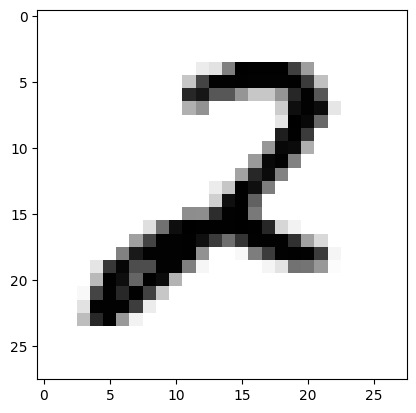

In [100]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

(-0.5, 27.5, 27.5, -0.5)

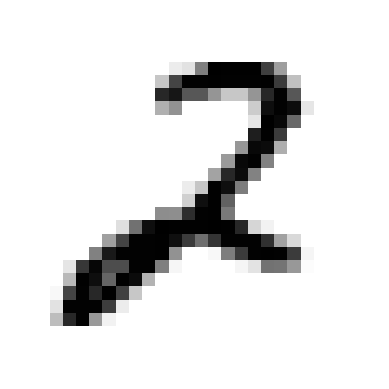

In [102]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [103]:
x_train, x_test = x[:60000], x[6000:70000]
y_train, y_test = y[:60000], y[6000:70000]

In [104]:
x_train_3 = x_train[y_train == '3']
y_train_3 = y_train[y_train == '3']

In [105]:
x_train_non_3 = x_train[y_train != '3']
y_train_non_3 = y_train[y_train != '3']

In [106]:
x_train_balanced = pd.concat([x_train_3, x_train_non_3])
y_train_balanced = pd.concat([y_train_3, y_train_non_3])

In [107]:
shuffle_index = np.random.permutation(len(x_train_balanced))
x_train_balanced = x_train_balanced.iloc[shuffle_index]
y_train_balanced = y_train_balanced.iloc[shuffle_index]

In [108]:
y_train_2 = (y_train_balanced == '3')

In [109]:
# Converting both training data and some_digit to NumPy arrays
x_train_balanced_np = x_train_balanced.values
y_train_2_np = y_train_2.values
some_digit_np = some_digit.values.reshape(1, -1)  # Make sure it's 2D for prediction

# Training the model again using NumPy arrays
clf = LogisticRegression(tol=0.1)
clf.fit(x_train_balanced_np, y_train_2_np)

# Predicting using NumPy arrays
clf.predict(some_digit_np)

array([False])

In [110]:
from sklearn.model_selection import cross_val_scorem

In [111]:
# Converting the test data to NumPy arrays
x_test_np = x_test.values

# Evaluating the model using the NumPy array for x_test
print(clf.score(x_test_np, y_test_2))


0.974125


In [112]:
# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.8977833333333334
